In [4]:
## Python notebook to test and debug python code for viz 2 route

#Importing Dependecies
import pandas as pd

In [1]:
## generating dummy result query for viz 2
## Chart of items found in a given area
## route should accept "Location" as a key-arguement
## Our GeoJson object should have , coordinates (x,y) , location


In [9]:
# Populating locations dict with dummy data

item_location = {
    'ID': [1 , 2 ,3,4,5],
    'Location': ['Castle' , 'Swamp' , 'Mountains' , 'Ocean' , 'Valley'] , 
    'Bomb': [4 , 3 , 10 , 7 , 8] , 
    'Arrows': [10 , 13 , 15 , 25 , 10] , 
    'Potions': [2 , 1 ,2 ,3 , 2] ,
    'Deku Sticks': [ 8 , 5 , 3 ,7 , 6] , 
    'X': [0 , .5 , .5 , -.5 , -.5] , 
    'Y': [0 , -.5 , .5 , -.5 , .5]
}


In [10]:
# Transforming the dictionary into a pandas dataframe
item_loc_df = pd.DataFrame(item_location);
item_loc_df.head()

,ID,Location,Bomb,Arrows,Potions,Deku Sticks,X,Y
0,1,Castle,4,10,2,8,0.0,0.0
1,2,Swamp,3,13,1,5,0.5,-0.5
2,3,Mountains,10,15,2,3,0.5,0.5
3,4,Ocean,7,25,3,7,-0.5,-0.5
4,5,Valley,8,10,2,6,-0.5,0.5


In [17]:
# Filtering down to specific location
castle = item_loc_df[item_loc_df['Location'] == 'Swamp']

In [19]:
# Displaying query result
castle.head()

,ID,Location,Bomb,Arrows,Potions,Deku Sticks,X,Y
1,2,Swamp,3,13,1,5,0.5,-0.5


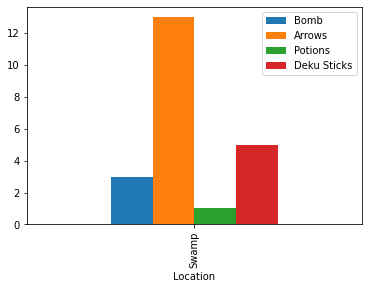

In [21]:
# Plotting result as a bar graph
# Verifying that structure is such that we can plot data as a bar chart
castle.plot.bar(x = 'Location' , y = ['Bomb' , 'Arrows' , 'Potions' , 'Deku Sticks'] )